# Klasifikasi Kualitas Coklat menggunakan Bernoulli Naive Bayes

# Metadata

https://www.kaggle.com/datasets/soroushghaderi/chocolate-bar-2020?select=chocolate.csv

ref : unique number for company

company : company name

company_location : company location

review_date : date review for chocolate bar

country_of_bean_origin : country of chocolate bean

specific_bean_origin_or_bar_name : province of chocolate bean

cocoa_percent : percent of chocolate bar

rating : chocolate bar rating

counts_of_ingredients : number of ingredients

beans : have bean or not

cocoa_butter : have cocoa butter or not

vanilla : have vanilla or not

lecithin : have lecithin or not

salt : have salt or not

sugar : have sugar or not

sweetener_without_sugar : have sweetener or not

first_taste : taste number one

second_taste : taste number two

third_taste : taste number three

fourth_taste : taste number four

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('chocolate.csv')

In [3]:
data.head()

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN


Terdapat 1 kolom bernama Unnamed:0 yang merupakan index. Kolom tersebut dapat dibuang.

In [4]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
data.head()

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN


In [6]:
data.shape

(2224, 20)

# Feature Transformation

## Change Company Location

company_location menunjukkan negara tempat perusahaan berada. Nilai dari fitur ini sangat beragam. Untuk mengatasinya, kita akna mengubah lokasi negara menjadi benua tempat negara tersebut berada.

<AxesSubplot:xlabel='company_location', ylabel='Count'>

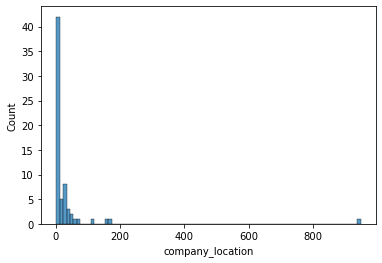

In [7]:
sns.histplot(data['company_location'].value_counts())

In [8]:
data['company_location'].unique()

array(['U.S.A', 'France', 'Fiji', 'Vanuatu', 'Ecuador', 'Mexico',
       'Switzerland', 'Netherlands', 'Spain', 'Peru', 'Canada', 'Italy',
       'Brazil', 'Nicaragua', 'U.k.', 'Australia', 'Philippines', 'Wales',
       'Belgium', 'Vietnam', 'Germany', 'Singapore', 'Venezuela',
       'Malaysia', 'Russia', 'South korea', 'Taiwan', 'Puerto rico',
       'Colombia', 'Japan', 'New zealand', 'Costa rica', 'Hungary',
       'Scotland', 'Martinique', 'Sao tome', 'St. lucia', 'Guatemala',
       'South africa', 'Dominican republic', 'Sao tome & principe',
       'Bolivia', 'Portugal', 'Norway', 'Denmark', 'Grenada', 'Israel',
       'India', 'St.vincent-grenadines', 'Czech republic', 'Thailand',
       'Finland', 'Madagascar', 'Sweden', 'Poland', 'Austria', 'Honduras',
       'U.a.e.', 'Lithuania', 'Ireland', 'Chile', 'Ghana', 'Iceland',
       'Argentina', 'Suriname', 'El salvador'], dtype=object)

In [9]:
north_america = ['U.S.A', 'Mexico', 'Canada']
central_america_and_caribbean = ['Nicaragua', 'Puerto rico', 'Costa rica', 'Martinique', 'St. lucia', 
                                 'Guatemala', 'Dominican republic', 'Grenada', 'St.vincent-grenadines', 'Honduras', 
                                 'El salvador']
south_america = ['Peru', 'Ecuador', 'Brazil', 'Venezuela', 'Colombia', 'Bolivia', 'Chile', 'Argentina', 'Suriname']
europe = ['France', 'Switzerland', 'Netherlands', 'Spain', 'Italy', 'U.k.', 'Wales', 'Belgium', 'Germany', 'Russia',
         'Hungary', 'Scotland', 'Portugal', 'Norway', 'Denmark', 'Czech republic', 'Finland', 'Sweden', 'Poland', 'Austria',
         'Lithuania', 'Ireland', 'Iceland']
asia = ['Philippines', 'Vietnam', 'Singapore', 'Malaysia', 'South korea', 'Taiwan', 'Japan', 'Israel', 'India', 'Thailand',
       'U.a.e.', ]
africa = ['Sao tome', 'South africa', 'Sao tome & principe', 'Madagascar', 'Ghana']
oceania = ['Fiji', 'Vanuatu', 'Australia', 'New zealand']

In [10]:
def change_company_location(data):
    new_company_location = []
    for country in data:
        if country in north_america:
            new_company_location.append('North America')
        elif country in south_america:
            new_company_location.append('South America')
        elif country in europe:
            new_company_location.append('Europe')
        elif country in asia:
            new_company_location.append('Asia')
        elif country in africa:
            new_company_location.append('Africa')
        elif country in central_america_and_caribbean:
            new_company_location.append('Central America and Caribbean')
        else:
            new_company_location.append('Oceania')
    return new_company_location

In [11]:
data['company_location'] = change_company_location(data['company_location'])

In [12]:
data['company_location'].value_counts()

North America                    1114
Europe                            683
South America                     156
Asia                              100
Oceania                            85
Central America and Caribbean      61
Africa                             25
Name: company_location, dtype: int64

## Bean Origin

country_of_bean_origin juga memiliki nilai yang sangat bervariasi. Untuk mengatasinya dilakukan hal yang sama dengan company_location.

<AxesSubplot:xlabel='country_of_bean_origin', ylabel='Count'>

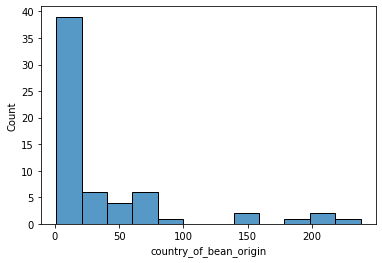

In [13]:
sns.histplot(data['country_of_bean_origin'].value_counts())

In [14]:
data['country_of_bean_origin'].unique()

array(['Madagascar', 'Dominican republic', 'Tanzania', 'Peru', 'Bolivia',
       'Venezuela', 'Ecuador', 'Brazil', 'Papua new guinea', 'Burma',
       'Panama', 'Colombia', 'Cuba', 'Togo', 'Sao tome', 'Mexico', 'Fiji',
       'Vanuatu', 'Indonesia', 'Trinidad', 'Vietnam', 'Nicaragua',
       'Ghana', 'Belize', 'Blend', 'Grenada', 'Jamaica', 'Guatemala',
       'Costa rica', 'Honduras', 'Haiti', 'India', 'Congo', 'Philippines',
       'Solomon islands', 'Uganda', 'Malaysia', 'Sri lanka',
       'Ivory coast', 'Gabon', 'Taiwan', 'Puerto rico', 'Martinique',
       'St. lucia', 'Australia', 'Liberia', 'Sierra leone', 'Nigeria',
       'U.s.a.', 'St.vincent-grenadines', 'Thailand', 'Tobago', 'Bolvia',
       'Sumatra', 'El salvador', 'Cameroon', 'Samoa',
       'Sao tome & principe', 'Principe', 'Sulawesi', 'Suriname',
       'Dr congo'], dtype=object)

In [15]:
data.loc[data['country_of_bean_origin'] == 'Bolvia', 'country_of_bean_origin'] = 'Bolivia'

In [16]:
africa = ['Madagascar', 'Tanzania', 'Togo', 'Sao tome', 'Ghana', 'Congo', 'Uganda', 'Ivory coast', 'Gabon', 'Liberia', 
          'Sierra leone', 'Nigeria', 'Tobago', 'Cameroon', 'Sao tome & principe', 'Principe', 'Dr congo']
caribbean_and_central_america = ['Dominican republic', 'Panama', 'Cuba', 'Trinidad', 'Nicaragua', 'Belize', 'Grenada',
                                'Jamaica', 'Guatemala', 'Costa rica', 'Honduras', 'Haiti', 'Puerto rico', 'Martinique',
                                 'St. lucia', 'St.vincent-grenadines', 'El salvador', ]
south_america = ['Peru', 'Bolivia', 'Venezuela', 'Ecuador', 'Brazil', 'Colombia', 'Suriname']
asia = ['Papua new guinea', 'Burma', 'Indonesia', 'Vietnam', 'India', 'Philippines', 'Malaysia', 'Sri lanka', 'Taiwan',
       'Thailand', 'Sumatra', 'Sulawesi']
north_america = ['Mexico', 'U.s.a.']
oceania = ['Fiji', 'Vanuatu', 'Solomon islands', 'Australia', 'Samoa', ]
Blend = ['Blend']

In [17]:
def change_bean_origin(data):
    bean_origin = []
    for country in data:
        if country in north_america:
            bean_origin.append('North America')
        elif country in south_america:
            bean_origin.append('South America')
        elif country in asia:
            bean_origin.append('Asia')
        elif country in africa:
            bean_origin.append('Africa')
        elif country in central_america_and_caribbean:
            bean_origin.append('Central America and Caribbean')
        elif country in Blend:
            bean_origin.append('Blend')
        else:
            bean_origin.append('Oceania')
    return bean_origin

In [18]:
data['bean_origin'] = change_bean_origin(data['country_of_bean_origin'])

In [19]:
data['bean_origin'].value_counts()

South America                    851
Central America and Caribbean    450
Africa                           310
Oceania                          213
Asia                             187
Blend                            140
North America                     73
Name: bean_origin, dtype: int64

In [20]:
data.drop(['country_of_bean_origin'], axis = 1, inplace = True)

## Company

In [21]:
data['company'].value_counts()

Soma                   52
Arete                  32
Fresco                 31
Bonnat                 28
Pralus                 26
                       ..
Britarev                1
Eclat (Felchlin)        1
Condor                  1
Vintage Plantations     1
Tree to Bar             1
Name: company, Length: 502, dtype: int64

In [22]:
data[data['company'] == 'Kiskadee']

,ref,company,company_location,review_date,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,bean_origin
1133,1251,Kiskadee,North America,2014,"La Red, Guanconjeco",60.0,3.0,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,gritty,overly sweet,citrus,NaN,Central America and Caribbean


In [23]:
data[data['company'] == 'Soma']

,ref,company,company_location,review_date,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,bean_origin
1882,387,Soma,North America,2009,Madagascar,70.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,subtle red berry,complex,NaN,NaN,Africa
1883,387,Soma,North America,2009,Ocumare,70.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,black tea,NaN,NaN,NaN,South America
1884,377,Soma,North America,2009,Africa,70.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,earthy,woody,vegetal,NaN,Africa
1885,387,Soma,North America,2009,Papua New Guinea,70.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,smokey,mushroom,woodsy,NaN,Asia
1886,377,Soma,North America,2009,Hispaniola,70.0,3.00,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sticky,few grits,mild fruit,sour,Central America and Caribbean
1887,387,Soma,North America,2009,Conacado,70.0,3.00,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,slow to develop,nutty,NaN,NaN,Central America and Caribbean
1888,607,Soma,North America,2010,"Black Science Blend 1, DR, Ecuador, Peru",70.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,complex,nut,dried fruit,earth,Blend
1889,676,Soma,North America,2011,Peruvian,64.0,4.00,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,complex,spice,caramel,cocoa,South America
1890,676,Soma,North America,2011,"Three Amigos(Chuao, Wild Bolivia, D.R.)",70.0,4.00,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,strawberry,cocoa,nutty,NaN,Blend
1891,682,Soma,North America,2011,"Elvesia P., Black Science",70.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,dried fruit,tart,NaN,NaN,Central America and Caribbean


In [24]:
data['company'].unique()

array(['5150', 'A. Morin', 'Acalli', 'Adi aka Fijiana (Easy In Ltd)',
       'Aelan', 'Aequare (Gianduja)', 'Ah Cacao', "Akesson's (Pralus)",
       'Alain Ducasse', 'Alexandre', 'Altus aka Cao Artisan', 'Amano',
       'Amatller (Simon Coll)', 'Amazona', 'Ambrosia', 'Amedei', 'AMMA',
       'Anahata', 'Animas', 'Ara', 'Arete', 'Argencove',
       'Artisan du Chocolat', 'Artisan du Chocolat (Casa Luker)',
       'Askinosie', 'Atypic', 'Auro', 'Bahen & Co.', 'Baiani', 'Bakau',
       'Bankston', 'Bar Au Chocolat', "Baravelli's", 'Batch', 'Bean',
       'Beau Cacao', 'Beehive', 'Belcolade', 'Bellflower', 'Belvie',
       'Belyzium', 'Benns', 'Benoit Nihant', 'Bernachon',
       'Beschle (Felchlin)', 'Bisou', 'Bitacora', 'Bittersweet Origins',
       'Bixby', 'Black Mountain', 'Black River (A. Morin)', 'Blanxart',
       'Blue Bandana', 'Boho', 'Bonaterra', 'Bonnat',
       'Bouga Cacao (Tulicorp)', 'Box Chocolate', 'Brasstown',
       "Brasstown aka It's Chocolate", 'Brazen', 'Breeze Mil

In [25]:
data['company'].nunique()

502

In [26]:
data['company'].value_counts()

Soma                   52
Arete                  32
Fresco                 31
Bonnat                 28
Pralus                 26
                       ..
Britarev                1
Eclat (Felchlin)        1
Condor                  1
Vintage Plantations     1
Tree to Bar             1
Name: company, Length: 502, dtype: int64

In [27]:
data = data.reset_index()
data.drop(['index'], axis = 1, inplace = True)

In [28]:
data.shape

(2224, 20)

<AxesSubplot:>

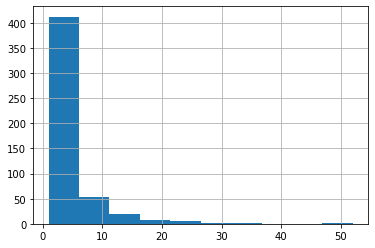

In [29]:
data['company'].value_counts().hist()

In [30]:
ind = 0

for i in data['company']:
    if data[data['company'] == i]['company'].count() < 7:
        data.drop([ind], axis = 0, inplace = True)
    ind += 1

In [31]:
data

,ref,company,company_location,review_date,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,bean_origin
3,797,A. Morin,Europe,2012,Peru,63.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN,South America
4,797,A. Morin,Europe,2012,Bolivia,70.0,3.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN,South America
5,1015,A. Morin,Europe,2013,Chuao,70.0,4.00,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,oily,nut,caramel,raspberry,South America
6,1019,A. Morin,Europe,2013,Chanchamayo Province,63.0,4.00,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sweet,cocoa,tangerine,NaN,South America
7,1011,A. Morin,Europe,2013,Equateur,70.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sandy,nutty,cocoa,fig,South America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,1205,Zotter,Europe,2014,Raw,80.0,2.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,waxy,cloying,vegetal,NaN,Blend
2220,1996,Zotter,Europe,2017,"APROCAFA, Acandi",75.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,strong nutty,marshmallow,NaN,NaN,South America
2221,2170,Zotter,Europe,2018,Maya Mtn,72.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,muted,roasty,accessible,NaN,Oceania
2222,2170,Zotter,Europe,2018,Mountains of the Moon,70.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fatty,mild nuts,mild fruit,NaN,Africa


In [32]:
data['company_location'].value_counts()

North America                    568
Europe                           429
South America                     53
Oceania                           35
Asia                              30
Central America and Caribbean      9
Name: company_location, dtype: int64

In [33]:
data['bean_origin'].value_counts()

South America                    449
Central America and Caribbean    208
Africa                           153
Oceania                          107
Blend                             89
Asia                              86
North America                     32
Name: bean_origin, dtype: int64

In [34]:
data['company'].value_counts()

Soma                      52
Arete                     32
Fresco                    31
Bonnat                    28
Pralus                    26
                          ..
Felchlin                   7
twenty-four blackbirds     7
El Rey                     7
Foundry                    7
Cacao Hunters              7
Name: company, Length: 90, dtype: int64

## Change rating values

Fitur rating memiliki rentangan nilai float. Kita akan mengubahnya menjadi bilangan bulat dari 0 hingga 4 sesuai aturan pada fungsi berikut.

<AxesSubplot:xlabel='rating', ylabel='Count'>

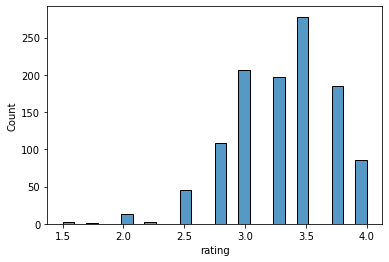

In [35]:
sns.histplot(data['rating'])

<AxesSubplot:xlabel='rating'>

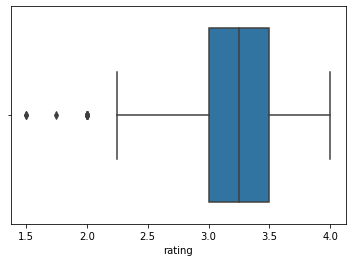

In [36]:
sns.boxplot(data['rating'])

In [37]:
new_rating = []

In [38]:
def change_rating_value(ratings):
    for rate in ratings:
        if rate <= 1.9:
            rate = 1
        elif rate <= 2.9:
            rate = 2
        elif rate <= 3.49:
            rate = 3
        elif rate <= 3.9:
            rate = 4
        else:
            rate = 5
        new_rating.append(rate)
    
    return new_rating

In [39]:
data['rating'] = change_rating_value(data['rating'])

In [40]:
data['rating'].value_counts()

4    463
3    403
2    170
5     85
1      3
Name: rating, dtype: int64

# Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.3, random_state = 6)

In [42]:
train['company'].nunique(), test['company'].nunique()

(90, 90)

In [43]:
train.shape

(786, 20)

In [44]:
train

,ref,company,company_location,review_date,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,bean_origin
1032,431,Holy Cacao,Asia,2009,San Martin,70.0,4,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,coffee,red berry,tart,NaN,South America
2209,879,Zotter,Europe,2012,Santo Domingo,70.0,4,4,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,strawberry,Cadbury egg,NaN,NaN,Central America and Caribbean
1218,2122,Letterpress,North America,2018,Ashanti,70.0,4,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,brownie,NaN,NaN,NaN,Africa
804,2072,Fossa,Asia,2018,Alto Beni,70.0,3,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,nuts,sour milk,NaN,NaN,South America
676,272,Domori,Europe,2008,Teyuna,70.0,3,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,creamy,woody,earthy,NaN,South America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,1672,Domori,Europe,2015,Ocumare 77,70.0,4,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,nutty,strawberry,creamy,NaN,South America
1182,1189,La Maison du Chocolat (Valrhona),Europe,2013,"Acarigua, w/ nibs",56.0,3,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sweet,nutty,cocoa,NaN,South America
478,1764,Chocolate Con Amor,North America,2016,Ocumare,80.0,3,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,gritty,nutty,caramel,NaN,South America
1355,1430,Maverick,North America,2014,"Morropon, Norandiono Coop, Piura",63.0,4,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sweet,cherry,cream,raisin,South America


In [45]:
test.shape

(338, 20)

In [46]:
test

,ref,company,company_location,review_date,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,bean_origin
879,2126,Friis Holm,Europe,2018,Indio Rojo,70.0,5,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,honey,deep cocoa,NaN,NaN,Central America and Caribbean
134,2024,Arete,North America,2017,Beniano,70.0,5,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,creamy,bright fruit,NaN,NaN,South America
309,1125,Brasstown aka It's Chocolate,North America,2013,Cooproagro,72.0,3,5,have_bean,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,oily,vanilla,caramel,dairy,Central America and Caribbean
1358,1430,Maverick,North America,2014,Tumbes,82.0,3,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,intense,burnt,bitter,spice,South America
2024,387,TCHO,North America,2009,TCHOPro 60.5,60.0,2,5,have_bean,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,tea,sweet,astringent,NaN,Blend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,995,Madre,North America,2012,Kaua'i Island,70.0,4,4,have_bean,have_cocoa_butter,have_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vanilla,brownie,peanut,NaN,North America
1889,676,Soma,North America,2011,Peruvian,64.0,5,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,complex,spice,caramel,cocoa,South America
2211,801,Zotter,Europe,2012,Amazonas Frucht,65.0,4,4,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,dairy,burnt caramel,coffee,NaN,Blend
700,765,Duffy's,Europe,2011,Ocumare,71.0,4,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,intense cocoa,NaN,NaN,NaN,South America


# Missing Value

In [47]:
train.isna().sum()

ref                                   0
company                               0
company_location                      0
review_date                           0
specific_bean_origin_or_bar_name      0
cocoa_percent                         0
rating                                0
counts_of_ingredients                 0
beans                                 0
cocoa_butter                          0
vanilla                               0
lecithin                              0
salt                                  0
sugar                                 0
sweetener_without_sugar               0
first_taste                           0
second_taste                         26
third_taste                         225
fourth_taste                        703
bean_origin                           0
dtype: int64

In [48]:
test.isna().sum()

ref                                   0
company                               0
company_location                      0
review_date                           0
specific_bean_origin_or_bar_name      0
cocoa_percent                         0
rating                                0
counts_of_ingredients                 0
beans                                 0
cocoa_butter                          0
vanilla                               0
lecithin                              0
salt                                  0
sugar                                 0
sweetener_without_sugar               0
first_taste                           0
second_taste                         13
third_taste                          93
fourth_taste                        289
bean_origin                           0
dtype: int64

# Feature Encoding

## Numerical Features

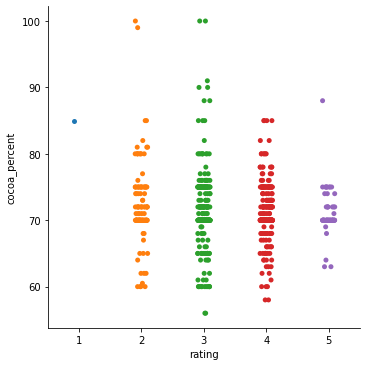

In [49]:
sns.catplot(x="rating", y="cocoa_percent", data = train)

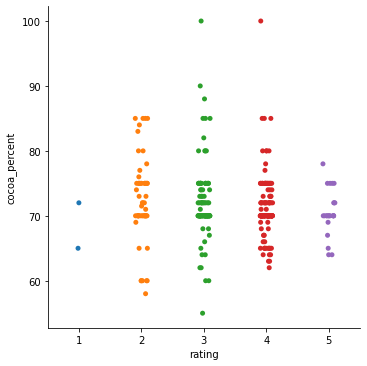

In [50]:
sns.catplot(x="rating", y="cocoa_percent", data = test)

## Nominal Features

### Number of Ingredients

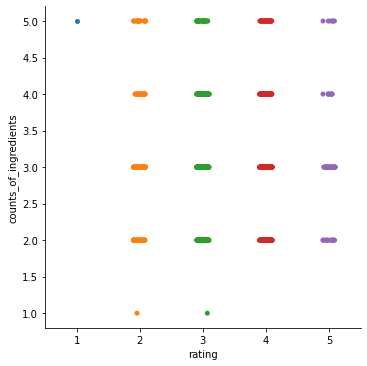

In [51]:
sns.catplot(x = "rating", y = "counts_of_ingredients", data = train)

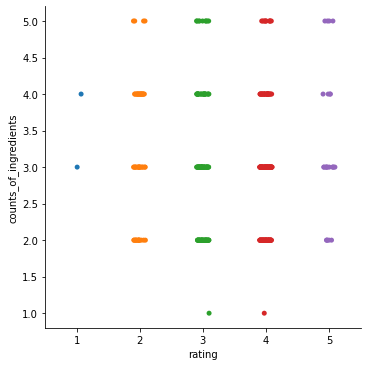

In [52]:
sns.catplot(x = "rating", y = "counts_of_ingredients", data = test)

### Company Location

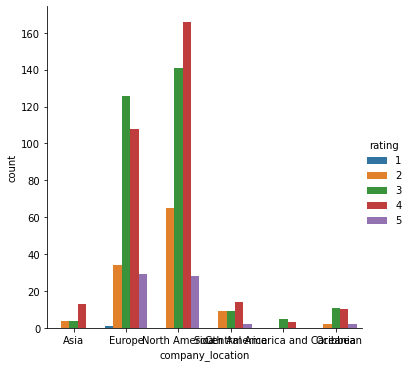

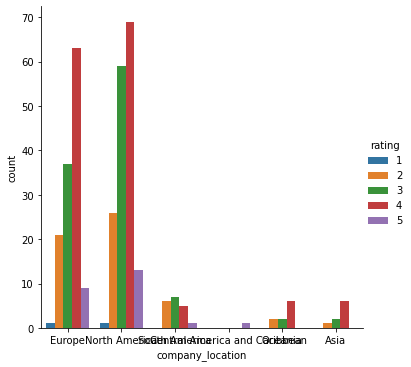

In [53]:
sns.catplot(x = 'company_location', kind = 'count', hue = "rating", data = train)
sns.catplot(x = 'company_location', kind = 'count', hue = "rating", data = test)

In [54]:
train['company_location'].nunique(), test['company_location'].nunique()

(6, 6)

In [55]:
encoded_train_companylocation = pd.get_dummies(train['company_location'])
encoded_test_companylocation = pd.get_dummies(test['company_location'])

In [56]:
encoded_train_companylocation.drop(['South America'], axis = 1, inplace = True)
encoded_test_companylocation.drop(['South America'], axis = 1, inplace = True)

In [57]:
train = pd.concat([train, encoded_train_companylocation], axis = 1)
test = pd.concat([test, encoded_test_companylocation], axis = 1)

### Bean Origin

In [58]:
encoded_train_bean_origin = pd.get_dummies(train['bean_origin'])
encoded_test_bean_origin = pd.get_dummies(test['bean_origin'])

In [59]:
encoded_train_bean_origin.shape, encoded_test_bean_origin.shape

((786, 7), (338, 7))

In [60]:
encoded_train_bean_origin['origin_africa'] = encoded_train_bean_origin['Africa']
encoded_train_bean_origin['origin_asia'] = encoded_train_bean_origin['Asia']
encoded_train_bean_origin['origin_central_america_caribbean'] = encoded_train_bean_origin['Central America and Caribbean']
encoded_train_bean_origin['origin_north_america'] = encoded_train_bean_origin['North America']
encoded_train_bean_origin['origin_oceania'] = encoded_train_bean_origin['Oceania']
encoded_train_bean_origin['origin_south_america'] = encoded_train_bean_origin['South America']

encoded_test_bean_origin['origin_africa'] = encoded_test_bean_origin['Africa']
encoded_test_bean_origin['origin_asia'] = encoded_test_bean_origin['Asia']
encoded_test_bean_origin['origin_central_america_caribbean'] = encoded_test_bean_origin['Central America and Caribbean']
encoded_test_bean_origin['origin_north_america'] = encoded_test_bean_origin['North America']
encoded_test_bean_origin['origin_oceania'] = encoded_test_bean_origin['Oceania']
encoded_test_bean_origin['origin_south_america'] = encoded_test_bean_origin['South America']

In [61]:
encoded_train_bean_origin.drop(['Africa', 'Asia', 'Blend', 'Central America and Caribbean', 'North America', 
                               'Oceania', 'South America'], axis = 1, inplace = True)
encoded_test_bean_origin.drop(['Africa', 'Asia', 'Blend', 'Central America and Caribbean', 'North America', 
                               'Oceania', 'South America'], axis = 1, inplace = True)

In [62]:
train = pd.concat([train, encoded_train_bean_origin], axis = 1)
test = pd.concat([test, encoded_test_bean_origin], axis = 1)

In [63]:
train.drop(['bean_origin'], axis = 1, inplace = True)
test.drop(['bean_origin'], axis = 1, inplace = True)

### Company

In [64]:
encoded_train_company = pd.get_dummies(train['company'])
encoded_test_company = pd.get_dummies(test['company'])

In [65]:
encoded_train_company.shape, encoded_test_company.shape

((786, 90), (338, 90))

In [66]:
train = pd.concat([train, encoded_train_company], axis = 1)
test = pd.concat([test, encoded_test_company], axis = 1)

In [67]:
train.shape

(786, 120)

In [68]:
test.shape

(338, 120)

In [69]:
test

,ref,company,company_location,review_date,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,...,Szanto Tibor,TCHO,Tejas,Terroir,Valrhona,Willie's Cacao,Woodblock,Zotter,hexx,twenty-four blackbirds
879,2126,Friis Holm,Europe,2018,Indio Rojo,70.0,5,3,have_bean,have_cocoa_butter,...,0,0,0,0,0,0,0,0,0,0
134,2024,Arete,North America,2017,Beniano,70.0,5,2,have_bean,have_not_cocoa_butter,...,0,0,0,0,0,0,0,0,0,0
309,1125,Brasstown aka It's Chocolate,North America,2013,Cooproagro,72.0,3,5,have_bean,have_cocoa_butter,...,0,0,0,0,0,0,0,0,0,0
1358,1430,Maverick,North America,2014,Tumbes,82.0,3,2,have_bean,have_not_cocoa_butter,...,0,0,0,0,0,0,0,0,0,0
2024,387,TCHO,North America,2009,TCHOPro 60.5,60.0,2,5,have_bean,have_cocoa_butter,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,995,Madre,North America,2012,Kaua'i Island,70.0,4,4,have_bean,have_cocoa_butter,...,0,0,0,0,0,0,0,0,0,0
1889,676,Soma,North America,2011,Peruvian,64.0,5,3,have_bean,have_cocoa_butter,...,0,0,0,0,0,0,0,0,0,0
2211,801,Zotter,Europe,2012,Amazonas Frucht,65.0,4,4,have_bean,have_cocoa_butter,...,0,0,0,0,0,0,0,1,0,0
700,765,Duffy's,Europe,2011,Ocumare,71.0,4,3,have_bean,have_cocoa_butter,...,0,0,0,0,0,0,0,0,0,0


### Drop Other Nominal Features

In [70]:
train.drop(['ref', 'company', 'company_location', 'review_date', 'specific_bean_origin_or_bar_name'], axis = 1, inplace = True)
test.drop(['ref', 'company', 'company_location', 'review_date', 'specific_bean_origin_or_bar_name'], axis = 1, inplace = True)

In [71]:
train

,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,...,Szanto Tibor,TCHO,Tejas,Terroir,Valrhona,Willie's Cacao,Woodblock,Zotter,hexx,twenty-four blackbirds
1032,70.0,4,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,...,0,0,0,0,0,0,0,0,0,0
2209,70.0,4,4,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,...,0,0,0,0,0,0,0,1,0,0
1218,70.0,4,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,...,0,0,0,0,0,0,0,0,0,0
804,70.0,3,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,...,0,0,0,0,0,0,0,0,0,0
676,70.0,3,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,70.0,4,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,...,0,0,0,0,0,0,0,0,0,0
1182,56.0,3,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,...,0,0,0,0,0,0,0,0,0,0
478,80.0,3,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,...,0,0,0,0,0,0,0,0,0,0
1355,63.0,4,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,...,0,0,0,0,0,0,0,0,0,0


In [72]:
test

,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,...,Szanto Tibor,TCHO,Tejas,Terroir,Valrhona,Willie's Cacao,Woodblock,Zotter,hexx,twenty-four blackbirds
879,70.0,5,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,...,0,0,0,0,0,0,0,0,0,0
134,70.0,5,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,...,0,0,0,0,0,0,0,0,0,0
309,72.0,3,5,have_bean,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,...,0,0,0,0,0,0,0,0,0,0
1358,82.0,3,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,...,0,0,0,0,0,0,0,0,0,0
2024,60.0,2,5,have_bean,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,70.0,4,4,have_bean,have_cocoa_butter,have_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,...,0,0,0,0,0,0,0,0,0,0
1889,64.0,5,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,...,0,0,0,0,0,0,0,0,0,0
2211,65.0,4,4,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,...,0,0,0,0,0,0,0,1,0,0
700,71.0,4,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,...,0,0,0,0,0,0,0,0,0,0


## Beans

Fitur khusus dimana semua nilainya sama pada dataset yaitu 1. Fitur ini bisa di drop.

In [73]:
train['beans']

1032    have_bean
2209    have_bean
1218    have_bean
804     have_bean
676     have_bean
          ...    
682     have_bean
1182    have_bean
478     have_bean
1355    have_bean
1796    have_bean
Name: beans, Length: 786, dtype: object

In [74]:
train['beans'].nunique()

1

In [75]:
test['beans'].nunique()

1

In [76]:
train.drop(['beans'], axis = 1, inplace = True)
test.drop(['beans'], axis = 1, inplace = True)

## Binary Features

In [77]:
def change_to_binary_values(data, u1, u2):
    l = []
    for i in data:
        if i == u1:
            l.append(0)
        else:
            l.append(1)
    return l

In [78]:
for features in ['cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar', 'sweetener_without_sugar']:
    unique1, unique2 = train[features].unique()
    train[features] = change_to_binary_values(train[features], unique1, unique2)
    test[features] = change_to_binary_values(test[features], unique1, unique2)

In [79]:
train

,cocoa_percent,rating,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,...,Szanto Tibor,TCHO,Tejas,Terroir,Valrhona,Willie's Cacao,Woodblock,Zotter,hexx,twenty-four blackbirds
1032,70.0,4,2,0,0,0,0,0,0,coffee,...,0,0,0,0,0,0,0,0,0,0
2209,70.0,4,4,1,0,0,1,1,1,strawberry,...,0,0,0,0,0,0,0,1,0,0
1218,70.0,4,3,1,0,0,0,0,0,brownie,...,0,0,0,0,0,0,0,0,0,0
804,70.0,3,2,0,0,0,0,0,0,nuts,...,0,0,0,0,0,0,0,0,0,0
676,70.0,3,2,0,0,0,0,0,0,creamy,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,70.0,4,2,0,0,0,0,0,0,nutty,...,0,0,0,0,0,0,0,0,0,0
1182,56.0,3,4,1,0,1,0,0,0,sweet,...,0,0,0,0,0,0,0,0,0,0
478,80.0,3,2,0,0,0,0,0,0,gritty,...,0,0,0,0,0,0,0,0,0,0
1355,63.0,4,3,1,0,0,0,0,0,sweet,...,0,0,0,0,0,0,0,0,0,0


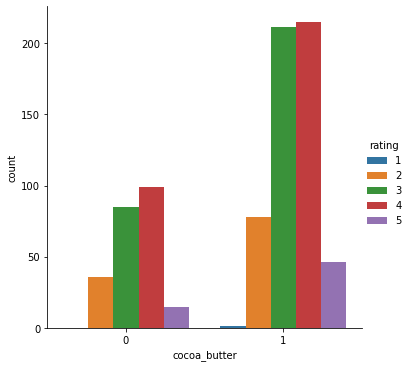

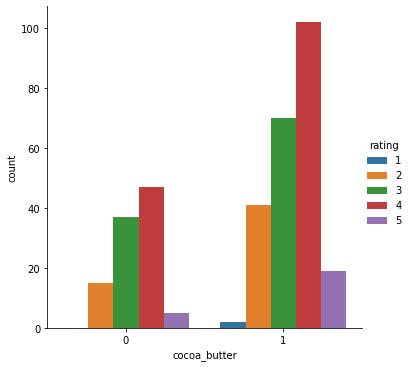

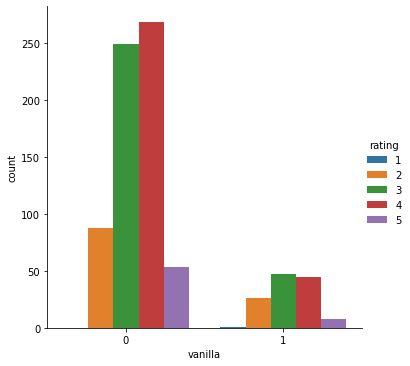

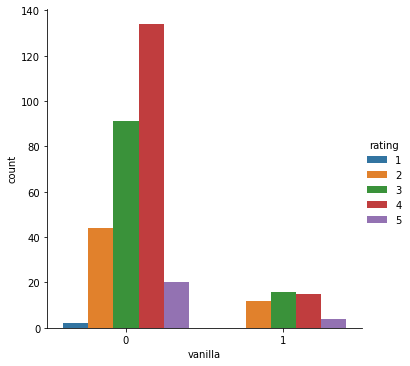

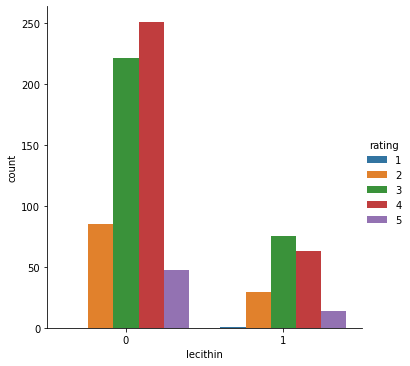

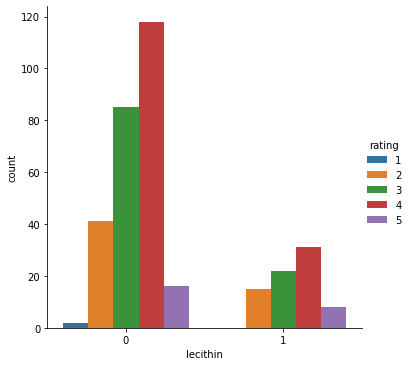

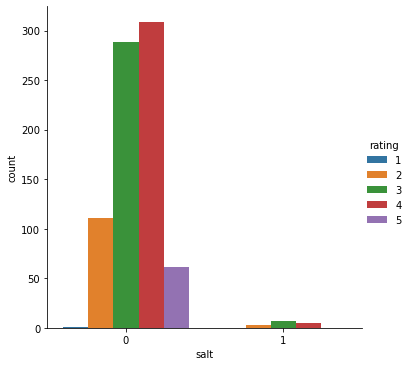

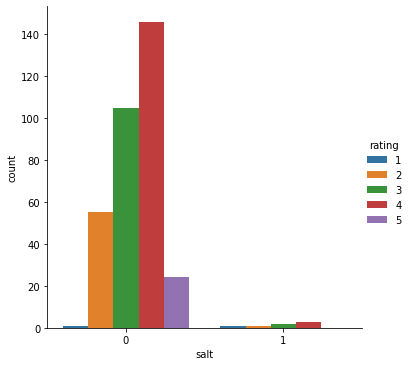

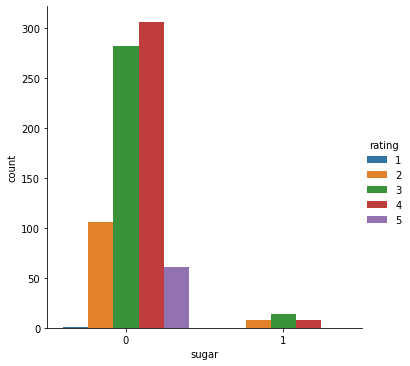

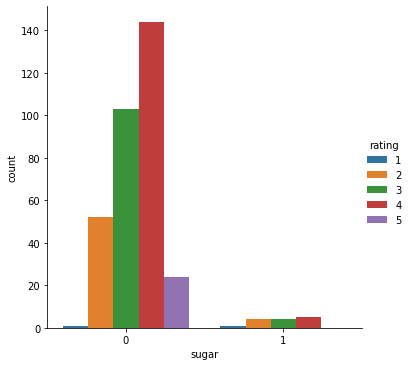

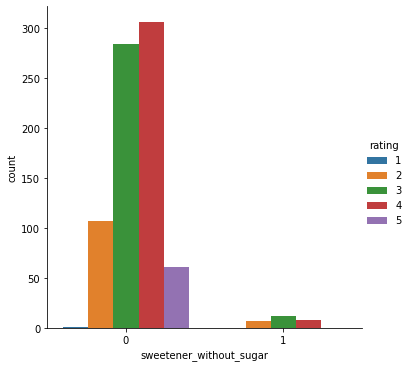

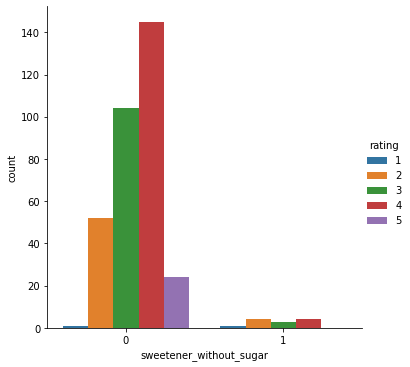

In [80]:
binary_features = ['cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar', 'sweetener_without_sugar']
for i in binary_features:
    sns.catplot(x = i, kind = 'count', hue = "rating", data = train)
    sns.catplot(x = i, kind = 'count', hue = "rating", data = test)

## Tastes

In [81]:
train[['first_taste', 'second_taste', 'third_taste', 'fourth_taste']]

,first_taste,second_taste,third_taste,fourth_taste
1032,coffee,red berry,tart,NaN
2209,strawberry,Cadbury egg,NaN,NaN
1218,brownie,NaN,NaN,NaN
804,nuts,sour milk,NaN,NaN
676,creamy,woody,earthy,NaN
...,...,...,...,...
682,nutty,strawberry,creamy,NaN
1182,sweet,nutty,cocoa,NaN
478,gritty,nutty,caramel,NaN
1355,sweet,cherry,cream,raisin


In [82]:
train['first_taste'].unique()

array(['coffee', 'strawberry', 'brownie', 'nuts', 'creamy', 'oily',
       'gummy', 'molasses', 'spice', 'nutty', 'floral', 'sandy', 'lemon',
       'berry notes with sweet edge', 'sticky', 'fatty', 'earthy',
       'roasty', 'licorice', 'muted', 'ashey', 'light color', 'intense',
       'delicate', 'gritty', 'intense sweet', 'mildly burnt caramel',
       'red fruit', 'dried fruit', 'mint', 'XL nibs', 'spicy', 'woody',
       'caramel', 'harsh flavor', 'flat', 'smooth', 'rich cocoa',
       'strong spice', 'smokey', 'chunky', 'sweet', 'grits', 'rich',
       'cashew', 'orange', 'bitter', 'tobacco', 'smoke', 'cocoa',
       'fruity', 'modest', 'marshmallow', 'dry', 'acidic',
       'high astringent', 'fig', 'fruit', 'raisins', 'rich brownie',
       'strong vanilla', 'super temper', 'intense earthy',
       'black current', 'very sweet', 'dirty', 'slight dry',
       'bold cherry', 'spicey', 'robust dark tropical fruit', 'vinegar',
       'muddy', 'mild smoke and fruit', 'sweet edge', 

In [83]:
train['first_taste'].nunique()

224

In [84]:
test['first_taste'].unique()

array(['honey', 'creamy', 'oily', 'intense', 'tea', 'fruity', 'roasty',
       'cocoa', 'spice', 'orange', 'complex', 'fatty', 'earthy', 'sticky',
       'gritty', 'deep', 'dry', 'spicy', 'nutty', 'banana', 'rustic',
       'sweet spice', 'off', 'floral', 'muted', 'cinamon', 'smooth',
       'choco covered strawberry', 'sandy', 'very spicy',
       'brief fruit note', 'vanilla', 'basic cocoa', 'green', 'raspberry',
       'simple', 'burnt rubber', 'spicey', 'metal', 'grassy', 'sweet',
       'deep cocoa', 'grapefruit', 'rich', 'herbs', 'large grits',
       'crumbly', 'mild bitter', 'perfume', 'burnt up front', 'vegetal',
       'rich cocoa', 'dark berry', 'green apple', 'tart',
       'dark forest berry', 'strong nutty', 'chemical', 'uneven melt',
       'coarse', 'baked bread', 'roasted nuts', 'bold', 'dried fruit',
       'basic', 'blackberries', 'sour milk', 'grass', 'chunky', 'smokey',
       'sour', 'chalky', 'cocoa and coconut', 'astringent', 'smoke',
       'intense smoke', 'da

In [85]:
test['first_taste'].nunique()

136

In [86]:
test[['first_taste', 'second_taste', 'third_taste', 'fourth_taste']]

,first_taste,second_taste,third_taste,fourth_taste
879,honey,deep cocoa,NaN,NaN
134,creamy,bright fruit,NaN,NaN
309,oily,vanilla,caramel,dairy
1358,intense,burnt,bitter,spice
2024,tea,sweet,astringent,NaN
...,...,...,...,...
1257,vanilla,brownie,peanut,NaN
1889,complex,spice,caramel,cocoa
2211,dairy,burnt caramel,coffee,NaN
700,intense cocoa,NaN,NaN,NaN


In [87]:
train.drop(['first_taste', 'second_taste', 'third_taste', 'fourth_taste'], axis = 1, inplace = True)
test.drop(['first_taste', 'second_taste', 'third_taste', 'fourth_taste'], axis = 1, inplace = True)

## Min Max Scaling

<AxesSubplot:xlabel='cocoa_percent', ylabel='Count'>

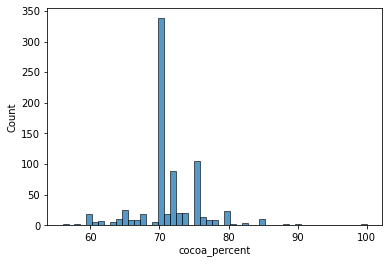

In [88]:
sns.histplot(x = 'cocoa_percent', data = train)

<AxesSubplot:xlabel='cocoa_percent', ylabel='Count'>

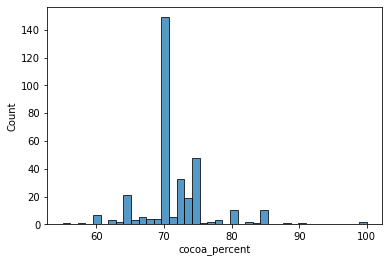

In [89]:
sns.histplot(x = 'cocoa_percent', data = test)

In [81]:
def standardize(data):
    new_val = []
    for i in data:
        new_val.append((i - data.mean()) / data.std())
    return new_val

def min_max_scaling(data):
    new_val = []
    maximum = data.max()
    minimum = data.min()
    for i in data:
        new_val.append((i - minimum) / (maximum - minimum))
    return new_val

In [82]:
train['cocoa_percent'] = min_max_scaling(train['cocoa_percent'])

In [83]:
test['cocoa_percent'] = min_max_scaling(test['cocoa_percent'])

<AxesSubplot:xlabel='cocoa_percent', ylabel='Count'>

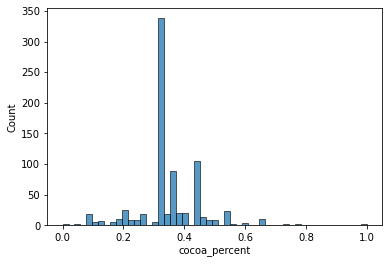

In [92]:
sns.histplot(x = 'cocoa_percent', data = train)

## Target

In [93]:
y_train = train['rating']
y_test = test['rating']

In [94]:
train.drop(['rating'], axis = 1, inplace = True)
test.drop(['rating'], axis = 1, inplace = True)

## Modelling

In [95]:
import optuna
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

def objective(trial):
    
    n_estimators = trial.suggest_int("n_estimators", 100, 200)
    max_depth = trial.suggest_int("max_depth", 5, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 10, 50)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 10, 100)
    rf = RandomForestClassifier(criterion = 'entropy', n_estimators = n_estimators, max_depth = max_depth, 
                                 min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
    rf.fit(train, y_train)
    y_pred = rf.predict(test)
    return accuracy_score(y_pred, y_test)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

[I 2022-06-05 20:59:02,763] A new study created in memory with name: no-name-8529f758-1a33-407d-a026-23a2c468a684
[I 2022-06-05 20:59:03,263] Trial 0 finished with value: 0.41420118343195267 and parameters: {'n_estimators': 192, 'max_depth': 6, 'min_samples_split': 49, 'min_samples_leaf': 35}. Best is trial 0 with value: 0.41420118343195267.
[I 2022-06-05 20:59:03,592] Trial 1 finished with value: 0.4289940828402367 and parameters: {'n_estimators': 127, 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 28}. Best is trial 1 with value: 0.4289940828402367.
[I 2022-06-05 20:59:04,027] Trial 2 finished with value: 0.4408284023668639 and parameters: {'n_estimators': 165, 'max_depth': 6, 'min_samples_split': 30, 'min_samples_leaf': 28}. Best is trial 2 with value: 0.4408284023668639.
[I 2022-06-05 20:59:04,390] Trial 3 finished with value: 0.41124260355029585 and parameters: {'n_estimators': 128, 'max_depth': 10, 'min_samples_split': 50, 'min_samples_leaf': 27}. Best is trial 2 w

### Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier(n_estimators = 165, max_depth = 6, min_samples_split = 30, min_samples_leaf = 28)
rf.fit(train, y_train)
print("Accuracy Score : ", accuracy_score(cross_val_predict(rf, test, y_test, cv = 10), y_test))
print("Confusion Matrix : \n", confusion_matrix(cross_val_predict(rf, test, y_test, cv = 10), y_test))

Accuracy Score :  0.4408284023668639
Confusion Matrix : 
 [[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  2  56 107 149  24]
 [  0   0   0   0   0]]


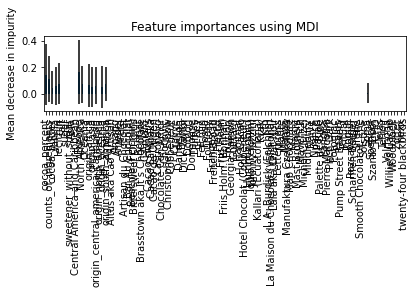

In [106]:
importances = rf.feature_importances_

rf_importances = pd.Series(importances, index = train.columns)
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

fig, ax = plt.subplots()
rf_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [107]:
rf_importances = pd.DataFrame(rf_importances)
rf_importances.columns = ['importances']
rf_importances.head()

,importances
cocoa_percent,0.143669
counts_of_ingredients,0.112574
cocoa_butter,0.048340
vanilla,0.061641
lecithin,0.077225


In [113]:
rf.fit(train[['cocoa_percent']], y_train)
print("Accuracy Score : ", accuracy_score(cross_val_predict(rf, test[['cocoa_percent']], y_test, cv = 10), y_test))
print("Confusion Matrix : \n", confusion_matrix(cross_val_predict(rf, test[['cocoa_percent']], y_test, cv = 10), y_test))

Accuracy Score :  0.4289940828402367
Confusion Matrix : 
 [[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   5   5   9   1]
 [  2  51 102 140  23]
 [  0   0   0   0   0]]


In [114]:
rf.fit(train[['cocoa_percent', 'counts_of_ingredients']], y_train)
print("Accuracy Score :", accuracy_score(cross_val_predict(rf, test[['cocoa_percent', 'counts_of_ingredients']], y_test, cv = 10), y_test))
print("Confusion Matrix : \n", confusion_matrix(cross_val_predict(rf, test[['cocoa_percent', 'counts_of_ingredients']], y_test, cv = 10), y_test))

Accuracy Score : 0.4319526627218935
Confusion Matrix : 
 [[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  2  56 107 149  24]
 [  0   0   0   0   0]]


In [110]:
rf.fit(train[['cocoa_percent', 'counts_of_ingredients', 'cocoa_butter']], y_train)
accuracy_score(cross_val_predict(rf, test[['cocoa_percent', 'counts_of_ingredients', 'cocoa_butter']], y_test, cv = 10), y_test)

0.4408284023668639

In [111]:
rf.fit(train[['cocoa_percent', 'counts_of_ingredients', 'cocoa_butter', 'vanilla']], y_train)
accuracy_score(cross_val_predict(rf, test[['cocoa_percent', 'counts_of_ingredients', 'cocoa_butter', 'vanilla']], y_test, cv = 10), y_test)

0.4378698224852071

In [112]:
rf.fit(train[['cocoa_percent', 'counts_of_ingredients', 'cocoa_butter', 'vanilla', 'lecithin']], y_train)
accuracy_score(cross_val_predict(rf, test[['cocoa_percent', 'counts_of_ingredients', 'cocoa_butter', 'vanilla', 'lecithin']], y_test, cv = 10), y_test)

0.4408284023668639